# OSEMN Exercises

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [25]:
import numpy.random as rnd

# Generate a list of random numbers
random_numbers = list(rnd.randint(1, 100,20))
#print(random_numbers)

# Save the list to a text file
with open("simple_data.txt", "w") as file:
    for number in random_numbers:
        file.write(f"{number}\n")
        
!type simple_data.txt

33
50
58
99
4
33
93
44
29
53
72
32
97
28
25
12
94
41
42
66


2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [26]:
# Generate a 5x5 matrix 
matrix = rnd.randint(1,100,[5,5])
lines = []
for i in range(5):
    line = matrix[i,:]
    lines.append(line)
    #print(matrix[i,:])
    
#print(matrix)

# Save the matrix into a file named "data.txt"
with open("data.txt","w") as file: 
    for line in lines: 
        file.write(f"{line}\n")
        
!type data.txt


[82 40 92 10 30]
[94 10 12  1 26]
[59 73 87 27 80]
[37 17 44 11 13]
[38 54 89 33 51]


3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [42]:
# Step 1: Clean the file -->  np.loadtxt() is designed to handle plain numeric data, so it fails when encountering these non-numeric characters.
clean_lines = []
with open("data.txt", "r") as file:
    for line in file:
        # Remove brackets and extra spaces
        clean_line = line.replace("[", "").replace("]", "")#.strip() 
        #The strip() method removes any leading or trailing whitespace (like spaces, tabs, newlines) from the string.
        #In this case, there are no extra spaces at the ends, so .strip() doesn’t change anything here. However, if there were any leading or trailing spaces, they would be removed.
        
         # Remove extra spaces between numbers
        clean_line = " ".join(clean_line.split())
        #This splits the line into individual words and then joins them back together with a single space. 
        #This removes any extra spaces between numbers, preventing empty fields when writing to CSV.
        #If you don't out this because of the larger space between 12 and 1 you'd get a double comma. 
        
        clean_lines.append(clean_line)
        
        
# Step 2: Save cleaned lines to a temporary file
with open("cleaned_data.txt", "w") as file:
    for clean_line in clean_lines:
        file.write(clean_line + "\n")

# Step 3: Load the cleaned file into NumPy
matrix = np.loadtxt("cleaned_data.txt")
print(matrix)

# Save the cleaned lines to a CSV file
with open("data.csv", "w") as file:
    for clean_line in clean_lines:
        # Replace spaces with commas to create a CSV format
        file.write(clean_line.replace(" ", ",") + "\n")

!type data.csv

[[82. 40. 92. 10. 30.]
 [94. 10. 12.  1. 26.]
 [59. 73. 87. 27. 80.]
 [37. 17. 44. 11. 13.]
 [38. 54. 89. 33. 51.]]
82,40,92,10,30
94,10,12,1,26
59,73,87,27,80
37,17,44,11,13
38,54,89,33,51


4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [52]:
# Load the !!**binary**!! file --> but actually I don't care about reading byte by byte so I don't use 'rb' mode

with open("credit_card.dat", "r") as file:
    cred_numbers = []
    
    for line in file:
        line = line.strip()  # Remove any leading/trailing whitespace (including newlines)
        
        line = line[:-4]  # Remove the last 4 characters
        
        # Divide the remaining line into 6-bit chunks and convert to characters
        char_line = "" # Initialize empty string
        for i in range(0, len(line), 6):
            chunk = line[i:i+6]  # Get a 6-bit chunk
            if len(chunk) < 6:  # Ignore incomplete chunks
                break
            # Convert the chunk (6-bit binary) to an integer, then to a character
            char = chr(int(chunk, 2)) 
            char_line += char #If the data you’re working with already contains spaces (or other delimiters) between values, then when you append those values, they might include the space as part of the string.
        
        # Step 5: Add the processed line to the list of credit card numbers
        cred_numbers.append(char_line)

# Step 6: Print the credit card numbers
for num in cred_numbers:
    print(num)


7648 5673 3775 2271
3257 8247 3354 2266
2722 0001 4011 6652
0661 3063 3742 3150
0432 1608 1462 4742
5827 2027 8785 7303
5774 8528 2087 1117
8140 1210 6352 2845
5764 1133 7301 7100
6456 1737 4126 6726
1228 8631 7382 0000
7051 0160 5374 3166
0618 3587 1630 6376
1545 5454 7444 5636
6735 3116 3202 6834
7287 5011 1547 8413
7033 2607 3328 4200
2568 5244 1874 5024
1684 2253 7570 7118
0672 2576 0575 6631
6332 8353 8787 1340
1813 3361 1175 4211
2477 6450 8840 2368
5512 3505 2563 1326
3083 7882 0621 0025
4521 5148 8045 0334
7563 3654 8713 5787
8324 2664 0476 5561
0565 2504 7168 3510
5107 5507 1767 0738
2462 1821 2448 1443
2788 0638 6861 6554
5851 5873 5474 0547
0670 1004 4013 2655
5874 5506 3048 0806
2805 5401 8462 1260
5083 8406 6310 1862
1076 1445 3013 2266
8440 4804 4844 5277
4758 6141 0686 1387
7586 0675 0315 2568
2544 1258 7432 5165
3474 5023 4434 5626
1410 0270 0434 5086
7315 4446 1104 4215
0224 7742 8300 0266
0170 2700 3145 0640
2006 2437 8054 1600
8142 4055 1776 0026
3026 7380 1241 1084


The spaces between numbers in your output might be arising from the structure of the binary data in your file. In the code, you're reading the binary data in 6-bit chunks and converting each chunk into a character using `chr(int(chunk, 2))`. The result will depend on the values of these 6-bit chunks.

### Explanation:
1. **How `chr(int(chunk, 2))` works:**
   The `int(chunk, 2)` converts the 6-bit chunk (a string like `'110010'`) into a decimal integer. This integer is then passed to `chr()`, which returns the corresponding character in the ASCII table. However, ASCII characters are typically 7 or 8 bits, not 6, so it may not correspond directly to printable characters or cause unintended formatting like spaces if the integer value maps to space or control characters.

2. **Potential cause of spaces:**
   If the binary data you're reading from the file contains 6-bit chunks that correspond to ASCII characters with values that are common for spacing (e.g., `chr(32)` maps to a space character), the `char_line` will have spaces where these chunks correspond to those values.


5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [64]:
import json

# Load the JSON file
with open("user_data.json", "r") as file:
    user_data = json.load(file) #loads the json file as a Python list of dictionaries
                                #Each dictionary contains the information of a user

# Filter the data where "CreditCardType" equals "American Express"
filtered_data = [entry for entry in user_data if entry.get("CreditCardType") == "American Express"] #this way you're selecting the dictionaries with this feature
print(filtered_data)

# Save the filtered data to a CSV file manually
with open("filtered_data.csv", "w") as csv_file:
    if filtered_data: # works if not empty (see notes below)
        # Write the header row
        headers = list(filtered_data[0].keys()) # you take the keys of the first dictionary (since for each dictionary the keys are the same)
        csv_file.write(",".join(headers) + "\n") # join(headers) takes the list of headers and joins them into a single string, with each element separated by a comma.
                                                # +"\n" appends a newline character to the end of the string so that the next data row starts on a new line.

        # Write the data rows
        for entry in filtered_data: # looping over the dictionaries
            row = [str(entry.get(header, "")) for header in headers] # entry.get(header, "") retrieves the value of the dictionary (entry) at the key associated to header (and we looop over all headers)
                                                                    # str makes the retrieved value a string so that all data is written as text, even if some values are numbers or other data types.
            csv_file.write(",".join(row) + "\n") # finally you write each row going to new line each time

print(f"Filtered data saved to 'filtered_data.csv'.")


[{'ID': '2', 'JobTitle': 'Investment  Advisor', 'EmailAddress': 'Clint_Thorpe5003@bulaffy.com', 'FirstNameLastName': 'Clint Thorpe', 'CreditCard': '7083-8766-0251-2345', 'CreditCardType': 'American Express'}, {'ID': '12', 'JobTitle': 'Retail Trainee', 'EmailAddress': 'Phillip_Carpenter9505@famism.biz', 'FirstNameLastName': 'Phillip Carpenter', 'CreditCard': '3657-0088-0820-5247', 'CreditCardType': 'American Express'}, {'ID': '28', 'JobTitle': 'Project Manager', 'EmailAddress': 'Russel_Graves1378@extex.org', 'FirstNameLastName': 'Russel Graves', 'CreditCard': '6718-4818-8011-6024', 'CreditCardType': 'American Express'}, {'ID': '39', 'JobTitle': 'Stockbroker', 'EmailAddress': 'Leanne_Newton1268@typill.biz', 'FirstNameLastName': 'Leanne Newton', 'CreditCard': '5438-0816-4166-4847', 'CreditCardType': 'American Express'}, {'ID': '57', 'JobTitle': 'Budget Analyst', 'EmailAddress': 'Tony_Giles1960@iatim.tech', 'FirstNameLastName': 'Tony Giles', 'CreditCard': '8130-3425-7573-7745', 'CreditCard

#### Notes
The statement `if filtered_data:` checks whether the `filtered_data` variable contains any elements or not. Here's how it works:
In Python, when you use an object in a conditional statement like `if object:`, it evaluates to either **True** (truthy) or **False** (falsy). For certain types of objects, the following rules apply:

- **Lists**: A list is considered **falsy** if it is empty (`[]`). Otherwise, it is **truthy** if it has one or more elements (e.g., `[1, 2, 3]`).
- **Other examples of falsy values**:
  - `None`
  - `0` (for integers or floats)
  - `False` (the boolean value)
  - Empty strings (`""`), dictionaries (`{}`), tuples (`()`), etc.


6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Describe what you see


      class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
...     ...        ...          ...        ...      ...   ...   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1                   1             0          0           4  ...   
2                 

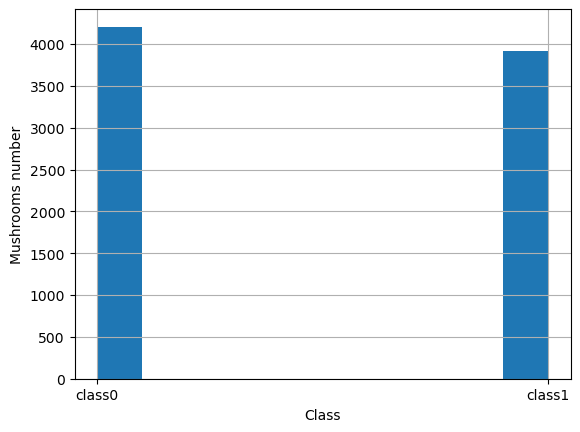

In [79]:
import requests
import pandas as pd

# Dropbox URL
url = 'https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1'

# Download the file using requests
response = requests.get(url)            # download the file at given url
file_path = 'mushrooms_categorized.csv' # storing the name of the file where the content will be saved locally 

#Save the file locally
with open(file_path, 'wb') as file:  #write binary mode. 
                                    #It tells Python to open the file for writing in binary mode, which is necessary for handling non-text content. 
    file.write(response.content) 

# Load the file into a Pandas DataFrame
data = pd.read_csv(file_path)

#See the data
print(data)

# Display the first few rows
#print(data.head())

import matplotlib.pyplot as plt

# Draw the histogram using pandas hist method
ax = data['class'].hist()

# Customize the x-axis labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['class0', 'class1'])

# Add axis labels
ax.set_xlabel('Class')
ax.set_ylabel('Mushrooms number')

# Show the plot
plt.show()


7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

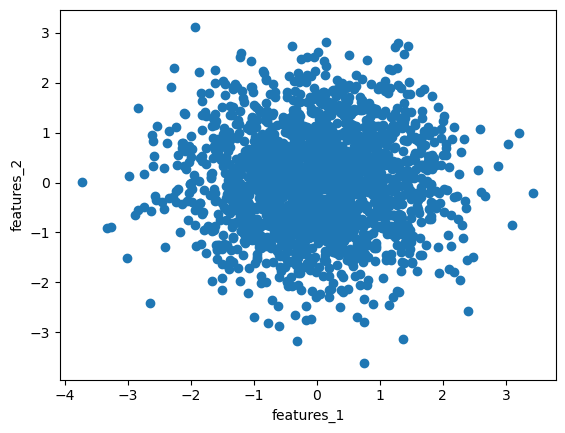

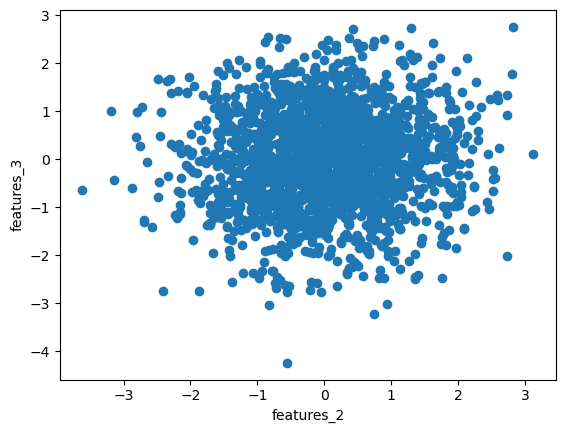

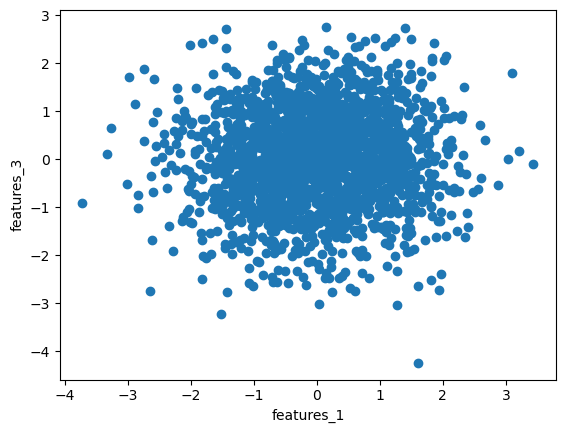

In [88]:
# Dropbox URL
url = 'https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1'

# Download the file using requests
response = requests.get(url)            # download the file at given url
file_path = 'regression_generated.csv' # storing the name of the file where the content will be saved locally 

#Save the file locally
with open(file_path, 'wb') as file:  #write binary mode. 
                                    #It tells Python to open the file for writing in binary mode, which is necessary for handling non-text content. 
    file.write(response.content) 

# Load the file into a Pandas DataFrame
data = pd.read_csv(file_path)
#data

# Plot a scatter plot of all possible combination of the following fields
plt.scatter(data['features_1'], data['features_2'])
plt.xlabel('features_1')
plt.ylabel('features_2')
plt.show()

plt.scatter(data['features_2'], data['features_3'])
plt.xlabel('features_2')
plt.ylabel('features_3')
plt.show()

plt.scatter(data['features_1'], data['features_3'])
plt.xlabel('features_1')
plt.ylabel('features_3')
plt.show()


8\. Load the same file of point 6, and convert the file to json with Pandas.

In [3]:
import requests
import pandas as pd

# Dropbox URL
url = 'https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1'

# Download the file using requests
response = requests.get(url)            # download the file at given url
file_path = 'mushrooms_categorized.csv' # storing the name of the file where the content will be saved locally 

#Save the file locally
with open(file_path, 'wb') as file:  #write binary mode. 
                                    #It tells Python to open the file for writing in binary mode, which is necessary for handling non-text content. 
    file.write(response.content) 

# Load the file into a Pandas DataFrame
df = pd.read_csv(file_path)


# Convert the DataFrame to a JSON file
df.to_json('data.json', orient='records', lines=True)  # Save as a JSON file